<a href="https://colab.research.google.com/github/guyzamos/MS_prediction/blob/main/MS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import all the relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import io
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import torch
from sklearn.model_selection import train_test_split



upload the db file

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)
drive.flush_and_unmount

In [ ]:
df=pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/MS_Notebooks/MSData_firstDB_Colab.xlsx")
df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


different way to upload the DB

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# import pandas as pd
# import io

# df = pd.read_csv('/content/MSDATA209.csv')
# df

aggregate all the rare medicines to one group

In [ ]:
df['treatment_when_sample_was_taken'].value_counts()


untreated                   35
IFN                         16
untreated                   12
Tysabri                      5
Gilenya                      2
Copaxone                     2
Tacfidera                    2
Imuran                       2
Plegridy                     1
Methotrexate, Prednisone     1
Ocrevus                      1
Name: treatment_when_sample_was_taken, dtype: int64

In [ ]:
df = df.replace({'Copaxone': 'other_treatment' , 'Tacfidera': 'other_treatment', 'Gilenya': 'other_treatment', 'Imuran': 'other_treatment', 'Methotrexate, Prednisone': 'other_treatment', 'Plegridy': 'other_treatment', 'Ocrevus': 'other_treatment'})

In [ ]:
df['treatment_when_sample_was_taken'].value_counts()


untreated          35
IFN                16
untreated          12
other_treatment    11
Tysabri             5
Name: treatment_when_sample_was_taken, dtype: int64

Fix string values to upperCase

In [ ]:
df['gender'] = df['gender'].str.upper()
df['diagnosis'] = df['diagnosis'].str.upper()
df['oligoclonal_band'] = df['oligoclonal_band'].str.upper()
df['treatment_when_sample_was_taken'] = df['treatment_when_sample_was_taken'].str.upper()
df.to_excel('df.xlsx',index=False)

global variable for number of rows

In [ ]:
count_samples = df.shape[0]
count_samples

79

replace all the illegal values to Nan

In [ ]:
df = df.replace({'1?': np.nan, 'X': np.nan, 2012: '06/06/2012'})



```
# This is formatted as code
```

remove white space before and after the word:

In [ ]:
df = df.applymap(lambda x: x.strip() if type(x)==str else x)
df.to_excel('dfStrip.xlsx',index=False)

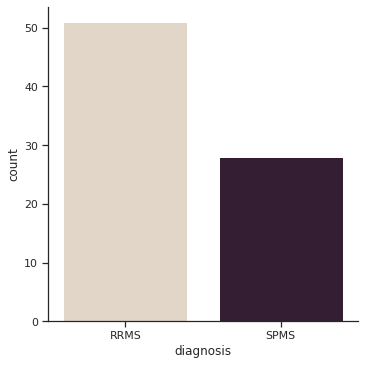

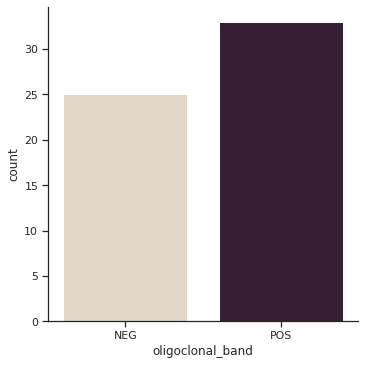

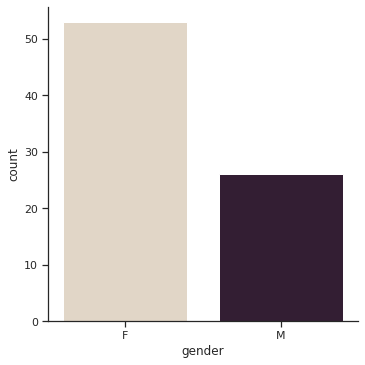

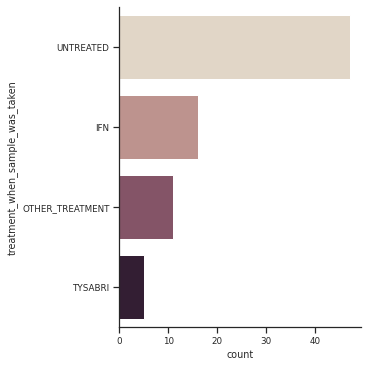

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="diagnosis", kind="count", palette="ch:.25", data=df)
sns.catplot(x="oligoclonal_band", kind="count", palette="ch:.25", data=df)
sns.catplot(x="gender", kind="count", palette="ch:.25", data=df)
sns.set_theme(style="ticks", color_codes=True, font_scale=0.8)
sns.catplot(y="treatment_when_sample_was_taken", kind="count", palette="ch:.25", data=df)
# f, ax = plt.subplots(figsize=(7, 3))


# df['gender'] = df['gender'].astype('category')
# df['oligoclonal_band'] = df['oligoclonal_band'].astype('category')
# df['treatment_when_sample_was_taken'] = df['treatment_when_sample_was_taken'].astype('category')
# df['sample_code'] = df['sample_code'].astype('category')
# df['diagnosis'] = df['diagnosis'].astype('category')

In [ ]:
df.to_excel('dfcheck.xlsx',index=False)

In [ ]:
print('MRI_lesion_mass')
max_value = df['MRI_lesion_mass'].max() 
print(max_value)
min_value = df['MRI_lesion_mass'].min() 
print(min_value)



print('TIM3_RQ')
max_value = df['TIM3_RQ'].max() 
print(max_value)
min_value = df['TIM3_RQ'].min() 
print(min_value)


print('TIGIT_RQ')
max_value = df['TIGIT_RQ'].max() 
print(max_value)
min_value = df['TIGIT_RQ'].min() 
print(min_value)


print('LAG3_RQ')
max_value = df['LAG3_RQ'].max() 
print(max_value)
min_value = df['LAG3_RQ'].min() 
print(min_value)


print('PD-1_RQ')
max_value = df['PD-1_RQ'].max() 
print(max_value)
min_value = df['PD-1_RQ'].min() 
print(min_value)

print('primary_EDSS_at_sample_date')
max_value = df['primary_EDSS_at_sample_date'].max() 
print(max_value)
min_value = df['primary_EDSS_at_sample_date'].min() 
print(min_value)


print('1_years_EDSS')
max_value = df['1_years_EDSS'].max() 
print(max_value)
min_value = df['1_years_EDSS'].min() 
print(min_value)

print('5_years_EDSS')
max_value = df['5_years_EDSS'].max() 
print(max_value)
min_value = df['5_years_EDSS'].min() 
print(min_value)

print('1_years_EDSS_from_sample_date')
max_value = df['1_years_EDSS_from_sample_date'].max() 
print(max_value)
min_value = df['1_years_EDSS_from_sample_date'].min() 
print(min_value)

print('5_years_from_sample')
max_value = df['5_years_from_sample'].max() 
print(max_value)
min_value = df['5_years_from_sample'].min() 
print(min_value)


print('EDSS_post_10_years')
max_value = df['EDSS_post_10_years'].max() 
print(max_value)
min_value = df['EDSS_post_10_years'].min() 
print(min_value)


MRI_lesion_mass
54811.0
0.0
TIM3_RQ
2.79738028452809
0.145306643566523
TIGIT_RQ
0.866082287788454
0.0242324879965762
LAG3_RQ
3.02893572968893
0.0195415818476979
PD-1_RQ
16.7971678906139
0.00718403819961321
primary_EDSS_at_sample_date
7.0
0.0
1_years_EDSS
5.5
0.0
5_years_EDSS
7.0
0.0
1_years_EDSS_from_sample_date
10.0
0.0
5_years_from_sample
10.0
0.0
EDSS_post_10_years
10.0
0.0


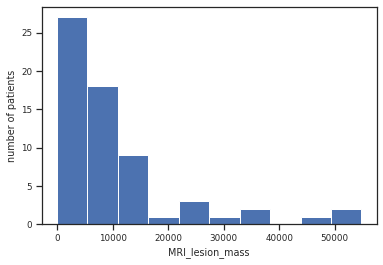

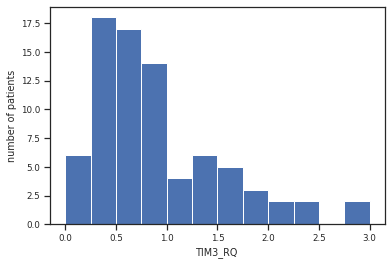

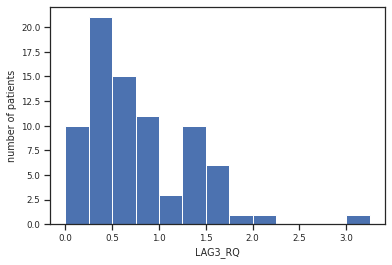

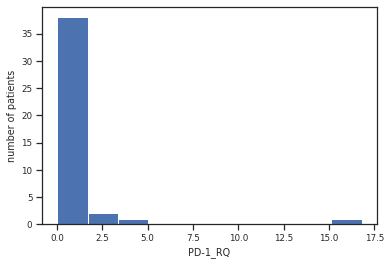

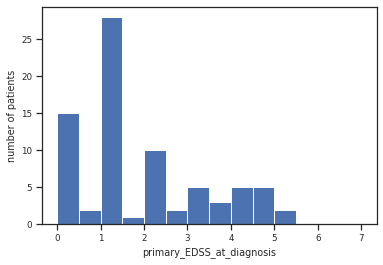

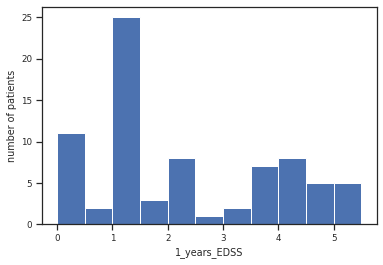

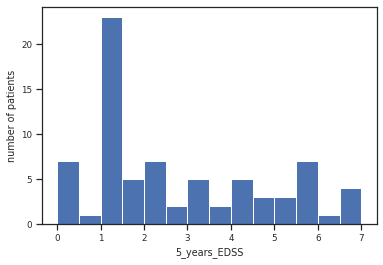

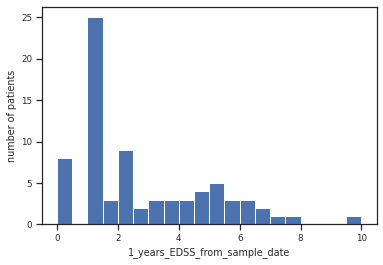

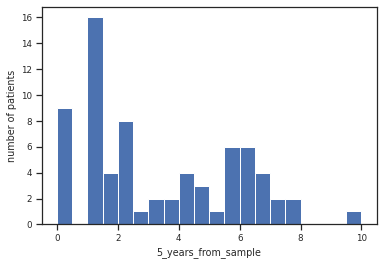

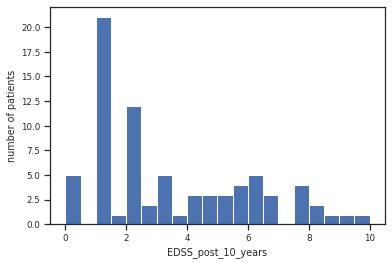

In [ ]:
degrees = df['MRI_lesion_mass']
plt.hist(degrees)
# plt.title('EDSS_post_10_years')
plt.xlabel('MRI_lesion_mass')
plt.ylabel('number of patients')
plt.show()

degrees = df['TIM3_RQ']
plt.hist(degrees, bins=[0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
# plt.title('TIM3_RQ')
plt.xlabel('TIM3_RQ')
plt.ylabel('number of patients')
plt.show()


degrees = df['LAG3_RQ']
plt.hist(degrees, bins=[0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25])
# plt.title('LAG3_RQ')
plt.xlabel('LAG3_RQ')
plt.ylabel('number of patients')
plt.show()



degrees = df['PD-1_RQ']
plt.hist(degrees)
# plt.title('PD-1_RQ')
plt.xlabel('PD-1_RQ')
plt.ylabel('number of patients')
plt.show()



degrees = df['primary_EDSS_at_diagnosis']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7])
# plt.title('primary_EDSS_at_diagnosis')
plt.xlabel('primary_EDSS_at_diagnosis')
plt.ylabel('number of patients')
plt.show()



degrees = df['1_years_EDSS']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5])
# plt.title('EDSS_post_10_years')
plt.xlabel('1_years_EDSS')
plt.ylabel('number of patients')
plt.show()

degrees = df['5_years_EDSS']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7])
# plt.title('EDSS_post_10_years')
plt.xlabel('5_years_EDSS')
plt.ylabel('number of patients')
plt.show()


degrees = df['1_years_EDSS_from_sample_date']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])
# plt.title('1_years_EDSS_from_sample_date')
plt.xlabel('1_years_EDSS_from_sample_date')
plt.ylabel('number of patients')
plt.show()

degrees = df['5_years_from_sample']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])
# plt.title('5_years_from_sample')
plt.xlabel('5_years_from_sample')
plt.ylabel('number of patients')
plt.show()

degrees = df['EDSS_post_10_years']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])
# plt.title('EDSS_post_10_years')
plt.xlabel('EDSS_post_10_years')
plt.ylabel('number of patients')
plt.show()


Looking at the percentage of missing 
values per column




In [ ]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/count_samples)*100})
missing_data

,total_missing,perc_missing
sample_date,0,0.000000
sample_code,0,0.000000
diagnosis,0,0.000000
TIM3_RQ,0,0.000000
TIGIT_RQ,0,0.000000
LAG3_RQ,0,0.000000
PD-1_RQ,37,46.835443
gender,0,0.000000
years_from_diagnosis_to_sample,3,3.797468
age_at_diagnosis,0,0.000000


filling missing data

In [ ]:
pdCol = df['PD-1_RQ']
edssTenCol = df['EDSS_post_10_years']
lymphCol = df['lymph_cells']
cellsTotalCol = df['cells_total']
mriLessionCol = df['MRI_lesion_mass']
five_years_sample = df['5_years_from_sample']
relapse_rate = df['relapse_rate_since_blood_sample']

In [ ]:
pdCol = pdCol[np.logical_not(np.isnan(pdCol))]
edssTenCol = edssTenCol[np.logical_not(np.isnan(edssTenCol))]
lymphCol = lymphCol[np.logical_not(np.isnan(lymphCol))]
cellsTotalCol = cellsTotalCol[np.logical_not(np.isnan(cellsTotalCol))]
mriLessionCol = mriLessionCol[np.logical_not(np.isnan(mriLessionCol))]
five_years_sample = five_years_sample[np.logical_not(np.isnan(five_years_sample))]
relapse_rate = relapse_rate[np.logical_not(np.isnan(relapse_rate))]

In [ ]:
df['PD-1_RQ'].fillna(stats.median(pdCol), inplace=True)
df['EDSS_post_10_years'].fillna(stats.median(edssTenCol), inplace=True)
df['lymph_cells'].fillna(stats.median(lymphCol), inplace=True)
df['cells_total'].fillna(stats.median(cellsTotalCol), inplace=True)
df['MRI_lesion_mass'].fillna(stats.median(mriLessionCol), inplace=True)
df['5_years_from_sample'].fillna(stats.median(five_years_sample), inplace=True)
df['relapse_rate_since_blood_sample'].fillna(stats.median(relapse_rate), inplace=True)

In [ ]:
#categorial sample
df['oligoclonal_band'].fillna(stats.mode(df['oligoclonal_band']), inplace=True)
df['gender'].fillna(stats.mode(df['gender']), inplace=True)
df['treatment_when_sample_was_taken'].fillna(stats.mode(df['treatment_when_sample_was_taken']), inplace=True)

#categorial diagnosis
df['diagnosis'].fillna(stats.mode(df['diagnosis']), inplace=True)



#numeric sample
df['PMN_cells'].fillna(stats.median(df['PMN_cells']), inplace=True)
df['TIM3_RQ'].fillna(stats.median(df['TIM3_RQ']), inplace=True)
df['TIGIT_RQ'].fillna(stats.median(df['TIGIT_RQ']), inplace=True)
df['LAG3_RQ'].fillna(stats.median(df['LAG3_RQ']), inplace=True)
df['primary_EDSS_at_sample_date'].fillna(stats.median(df['primary_EDSS_at_sample_date']), inplace=True)
df['years_from_diagnosis_to_sample'].fillna(stats.median(df['years_from_diagnosis_to_sample']), inplace=True)


#numeric diagnosis
df['primary_EDSS_at_diagnosis'].fillna(stats.median(df['primary_EDSS_at_diagnosis']), inplace=True)
df['age_at_diagnosis'].fillna(stats.median(df['age_at_diagnosis']), inplace=True)


df['MRI_date'].fillna(stats.mode(df['MRI_date']), inplace=True)
df['1_years_EDSS'].fillna(stats.median(df['1_years_EDSS']), inplace=True)
df['5_years_EDSS'].fillna(stats.median(df['5_years_EDSS']), inplace=True)
df['1_years_EDSS_from_sample_date'].fillna(stats.median(df['1_years_EDSS_from_sample_date']), inplace=True)
df['5_years_from_sample'].fillna(stats.median(df['5_years_from_sample']), inplace=True)
df['num_of_medicine_changed'].fillna(stats.median(df['num_of_medicine_changed']), inplace=True)
df['relapse_rate_since_blood_sample'].fillna(stats.median(df['relapse_rate_since_blood_sample']), inplace=True)




In [ ]:
df.to_excel('df.xlsx',index=False)

check if the filling missing values succeeded

In [ ]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/count_samples)*100})
missing_data

,total_missing,perc_missing
sample_date,0,0.000000
sample_code,0,0.000000
diagnosis,0,0.000000
TIM3_RQ,0,0.000000
TIGIT_RQ,0,0.000000
LAG3_RQ,0,0.000000
PD-1_RQ,0,0.000000
gender,0,0.000000
years_from_diagnosis_to_sample,0,0.000000
age_at_diagnosis,0,0.000000


define the data types

In [ ]:
df.dtypes

sample_date                         object
sample_code                         object
diagnosis                           object
TIM3_RQ                            float64
TIGIT_RQ                           float64
LAG3_RQ                            float64
PD-1_RQ                            float64
gender                              object
years_from_diagnosis_to_sample     float64
age_at_diagnosis                     int64
primary_EDSS_at_diagnosis          float64
1_years_EDSS                       float64
5_years_EDSS                       float64
primary_EDSS_at_sample_date        float64
1_years_EDSS_from_sample_date      float64
5_years_from_sample                float64
EDSS_post_10_years                 float64
oligoclonal_band                    object
lymph_cells                        float64
PMN_cells                          float64
cells_total                        float64
MRI_lesion_mass                    float64
MRI_date                            object
treatment_w

In [ ]:
df

In [ ]:
df.to_excel('df.xlsx',index=False)

In [ ]:
#define date type
#float
df['sample_date'] = pd.to_datetime(df['sample_date'])
df['MRI_date'] = pd.to_datetime(df['MRI_date'])


#define numeric type MRI
df['MRI_lesion_mass'] = df['MRI_lesion_mass'].astype('float64')

#define category type sample
df['gender'] = df['gender'].astype('category')
df['oligoclonal_band'] = df['oligoclonal_band'].astype('category')
df['treatment_when_sample_was_taken'] = df['treatment_when_sample_was_taken'].astype('category')
df['sample_code'] = df['sample_code'].astype('category')

#define category type diagnosis
df['diagnosis'] = df['diagnosis'].astype('category')


#numeric int new
df['lymph_cells'] = df['lymph_cells'].astype('int64')
df['PMN_cells'] = df['PMN_cells'].astype('int64')
df['cells_total'] = df['cells_total'].astype('int64')
df['TIM3_RQ'] = df['TIM3_RQ'].astype('float64')
df['TIGIT_RQ'] = df['TIGIT_RQ'].astype('float64')
df['LAG3_RQ'] = df['LAG3_RQ'].astype('float64')
df['PD-1_RQ'] = df['PD-1_RQ'].astype('float64')
df['primary_EDSS_at_sample_date'] = df['primary_EDSS_at_sample_date'].astype('float64')
df['EDSS_post_10_years'] = df['EDSS_post_10_years'].astype('float64')


#define numeric type diagnosis
df['primary_EDSS_at_diagnosis'] = df['primary_EDSS_at_diagnosis'].astype('float64')
df['1_years_EDSS'] = df['1_years_EDSS'].astype('float64')
df['5_years_EDSS'] = df['5_years_EDSS'].astype('float64')
df['1_years_EDSS_from_sample_date'] = df['1_years_EDSS_from_sample_date'].astype('float64')
df['5_years_from_sample'] = df['5_years_from_sample'].astype('float64')
df['EDSS_post_10_years'] = df['EDSS_post_10_years'].astype('float64')
df['years_from_diagnosis_to_sample'] = df['years_from_diagnosis_to_sample'].astype('int64')
df['age_at_diagnosis'] = df['age_at_diagnosis'].astype('int64')
df['num_of_medicine_changed'] = df['num_of_medicine_changed'].astype('int64')
df['relapse_rate_since_blood_sample'] = df['relapse_rate_since_blood_sample'].astype('int64')

df.dtypes

sample_date                        datetime64[ns]
sample_code                              category
diagnosis                                category
TIM3_RQ                                   float64
TIGIT_RQ                                  float64
LAG3_RQ                                   float64
PD-1_RQ                                   float64
gender                                   category
years_from_diagnosis_to_sample              int64
age_at_diagnosis                            int64
primary_EDSS_at_diagnosis                 float64
1_years_EDSS                              float64
5_years_EDSS                              float64
primary_EDSS_at_sample_date               float64
1_years_EDSS_from_sample_date             float64
5_years_from_sample                       float64
EDSS_post_10_years                        float64
oligoclonal_band                         category
lymph_cells                                 int64
PMN_cells                                   int64


keep only relevant samples (before 2014)

In [ ]:
df =  df[(df['sample_date']  < '1.1.14')]
#remove the time from dateTime
df['sample_date'] = df['sample_date'].dt.date
df['MRI_date'] = df['MRI_date'].dt.date




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df.dtypes

sample_date                          object
sample_code                        category
diagnosis                          category
TIM3_RQ                             float64
TIGIT_RQ                            float64
LAG3_RQ                             float64
PD-1_RQ                             float64
gender                             category
years_from_diagnosis_to_sample        int64
age_at_diagnosis                      int64
primary_EDSS_at_diagnosis           float64
1_years_EDSS                        float64
5_years_EDSS                        float64
primary_EDSS_at_sample_date         float64
1_years_EDSS_from_sample_date       float64
5_years_from_sample                 float64
EDSS_post_10_years                  float64
oligoclonal_band                   category
lymph_cells                           int64
PMN_cells                             int64
cells_total                           int64
MRI_lesion_mass                     float64
MRI_date                        

export the data frame to excel file

In [ ]:
df.to_excel('dfAfterFillNA.xlsx',index=False)

transform categorical features to numeric features

In [ ]:
df_oligoclonal_band = pd.get_dummies(df['oligoclonal_band'])
df_gender = pd.get_dummies(df['gender'])
df_diagnosis = pd.get_dummies(df['diagnosis'])
df_treatment = pd.get_dummies(df['treatment_when_sample_was_taken'])

In [ ]:
#add the new dummy variables to the df
df = df.merge(df_oligoclonal_band, left_index=True, right_index=True)
df = df.merge(df_gender, left_index=True, right_index=True)
df = df.merge(df_diagnosis, left_index=True, right_index=True)
df = df.merge(df_treatment, left_index=True, right_index=True)

In [ ]:
df.to_excel('dfAfterDummies.xlsx',index=False)

In [ ]:
df = df.rename(columns = {'COPAXONE': 'med_COPAXONE', 'GILENYA': 'med_GILENYA', 'IFN': 'med_IFN', 'IMURAN': 'med_IMURAN', 'METHOTREXATE, PREDNISONE': 'med_METHOTREXATE_PREDNISONE', 'OCREVUS': 'med_OCREVUS', 'PLEGRIDY': 'med_PLEGRIDY', 'TACFIDERA': 'med_TACFIDERA', 'TYSABRI': 'med_TYSABRI', 'UNTREATED ': 'med_UNTREATED'}, inplace = False)
df = df.rename(columns = {'POS': 'positive_OCB', 'M': 'Male', 'age_at_diagnosis' : 'age_at_diagnosis', 'RRMS' : 'diagnosis_RRMS', 'primary_EDSS_at_diagnosis' : 'primary_EDSS_at_diagnosis' , 'MRI_lesion_mass' : 'MRI_lesion_mass', 'TIGIT_RQ' : 'TIGIT_RQ', 'TIM3_RQ': 'TIM3_RQ', 'LAG3_RQ' : 'LAG3_RQ' , 'PD-1_RQ' : 'PD-1_RQ','EDSS_post_10_years': 'EDSS_post_10_years'}, inplace = False)

In [ ]:
df.to_excel('dfAfterRename.xlsx',index=False)


convert dummys to category

In [ ]:
df['NEG'] = df['NEG'].astype('category')
df['positive_OCB'] = df['positive_OCB'].astype('category')
df['F'] = df['F'].astype('category')
df['Male'] = df['Male'].astype('category')
df['diagnosis_RRMS'] = df['diagnosis_RRMS'].astype('category')
df['SPMS'] = df['SPMS'].astype('category')
df['med_IFN'] = df['med_IFN'].astype('category')
df['OTHER_TREATMENT'] = df['OTHER_TREATMENT'].astype('category')
df['med_TYSABRI'] = df['med_TYSABRI'].astype('category')
df['UNTREATED'] = df['UNTREATED'].astype('category')

In [ ]:
df.to_pickle('DFDB1Final.pkl')

function for calculate cross validation score on one DB

In [ ]:
def calcCrossValidation(model, data, predictors, outcome):

    # Perform k-fold cross-validation with 10 folds
    kf = KFold(n_splits=10)
    accuracy = []
    for train, test in kf.split(data):
        # Filter training data
        train_predictors = (data[predictors].iloc[train, :])
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        # Record accuracy from each cross-validation run
        accuracy.append(model.score(data[predictors].iloc[test, :], data[outcome].iloc[test]))

    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(accuracy)))
    print(accuracy)

function for calcuate RMSE on one DB only train

In [ ]:
# def calc_rmse(model, data, predictors, outcome):

#   # Fit the model on training set:
#   model.fit(data[predictors], data[outcome])
#   # Make predictions on training set:
#   y_predicted = model.predict(data[predictors])
#   rmse = sqrt(mean_squared_error(data[outcome], y_predicted))  
#   print(rmse)

In [ ]:
def calc_rmse(model, data, predictors, outcome):
  df_label = data[outcome]
  df_predictors = data[predictors]
  X_train, X_test, y_train, y_test = train_test_split(df_predictors, df_label)
  # Fit the model on training set:
  model.fit(X_train,  y_train)
  # Make predictions on training set:
  y_predicted = model.predict(X_test)
  rmse = sqrt(mean_squared_error(y_test, y_predicted))  
  print(rmse)

calculate accuracy just on train one DB

In [ ]:
def calcAccuracy(model, data, predictors, outcome):
    # Fit the model:
    model.fit(data[predictors], data[outcome])
    # Make predictions on training set:
    predictions = model.predict(data[predictors])
    # Print accuracy
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Training accuracy : %s" % "{0:.3%}".format(accuracy))

In [ ]:
# # check RMSE - Random Forest Algorithm
#pmn cells, lymph cells, num of medicine changed not in predicator because it increase rmse 
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
predictor_var = ['MRI_lesion_mass','primary_EDSS_at_diagnosis','primary_EDSS_at_sample_date','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB', 'OTHER_TREATMENT', 'UNTREATED', 'med_IFN','med_TYSABRI','cells_total']
outcome_var = 'EDSS_post_10_years'
calc_rmse(rf, df, predictor_var, outcome_var)

2.566677489154673


In [ ]:
# check accuracy - Random Forest Algorithm
rf = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')
#num of medicine changed not in predicator because it increase rmse 
predictor_var = ['PMN_cells','lymph_cells','MRI_lesion_mass','primary_EDSS_at_diagnosis','primary_EDSS_at_sample_date','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB', 'OTHER_TREATMENT', 'UNTREATED', 'med_IFN','med_TYSABRI','cells_total']
outcome_var = 'diagnosis_RRMS'
calcAccuracy(rf, df, predictor_var, outcome_var)

Training accuracy : 92.982%


In [ ]:
df.dtypes

sample_date                          object
sample_code                        category
diagnosis                          category
TIM3_RQ                             float64
TIGIT_RQ                            float64
LAG3_RQ                             float64
PD-1_RQ                             float64
gender                             category
years_from_diagnosis_to_sample        int64
age_at_diagnosis                      int64
primary_EDSS_at_diagnosis           float64
1_years_EDSS                        float64
5_years_EDSS                        float64
primary_EDSS_at_sample_date         float64
1_years_EDSS_from_sample_date       float64
5_years_from_sample                 float64
EDSS_post_10_years                  float64
oligoclonal_band                   category
lymph_cells                           int64
PMN_cells                             int64
cells_total                           int64
MRI_lesion_mass                     float64
MRI_date                        

In [ ]:
# check Cross Validation Score - Random Forest Algorithm
rf = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')
# Train the model on training data
predictor_var = ['MRI_lesion_mass','primary_EDSS_at_diagnosis','primary_EDSS_at_sample_date','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB', 'OTHER_TREATMENT', 'UNTREATED', 'med_IFN','med_TYSABRI','cells_total']
outcome_var = 'diagnosis_RRMS'
calcCrossValidation(rf, df, predictor_var, outcome_var)

Cross-Validation Score : 79.000%
[0.8333333333333334, 0.3333333333333333, 0.8333333333333334, 0.8333333333333334, 1.0, 0.8333333333333334, 0.8333333333333334, 0.6, 0.8, 1.0]


In [ ]:
logisticRegrDF = LogisticRegression(max_iter=2000)
predictor_var = ['MRI_lesion_mass','primary_EDSS_at_diagnosis','primary_EDSS_at_sample_date','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB', 'OTHER_TREATMENT', 'UNTREATED', 'med_IFN','med_TYSABRI','cells_total']
outcome_var = 'diagnosis_RRMS'
calcAccuracy(logisticRegrDF, df, predictor_var, outcome_var)

Training accuracy : 94.737%


visualize the data distribution

In [ ]:
df.describe

Example for binning

In [ ]:
# # function for binning
# def binning(col, cut_points, labels=None):
#     # Define min and max values:
#     minval = col.min()
#     maxval = col.max()

#     # create list by adding min and max to cut_points
#     break_points = [minval] + cut_points + [maxval]

#     # if no labels provided, use default labels 0 ... (n-1)
#     if not labels:
#         labels = range(len(cut_points)+1)

#     # Binning using cut function of pandas
#     colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True)
#     return colBin


# #Define bins
# bins = [2, 5.5]
# group_names = ['Low', 'Medium', 'High']
# # Discretize the values in EDSSPost10y attribute
# df["EDSSPost10y_Bin"] = binning(df["EDSSPost10y"], bins, group_names)

# # Count the number of observations which each value
# print(pd.value_counts(df["EDSSPost10y_Bin"], sort=False))
# print(df.head(10))

# #another way for discretization, using qcut function from pandas library
# df["EDSSPost10y_EqualFreq"] = pd.qcut(df["EDSSPost10y"],q=[0,.333,.6666,1],labels=["Low","Medium","High"])
# print(df.head(10))

Eample of handle outliers

In [ ]:
# print(df[(np.abs(df.EDSSPost10y-df.EDSSPost10y.mean()) <= (3*df.EDSSPost10y.std()))])
# plt.show()

Example of adding normalized col

In [ ]:
# #Variable transformation  0.5*sqrt('EDSSPost10y’) function
# square_root = lambda x: 0.5 * np.sqrt(x)
# df['Normalized_EDSSPost10y'] = df['EDSSPost10y'].apply(square_root)
# print(df.head(10))

calculate Accuracy Two databases train on one and test on the other

In [ ]:
def calcAccuracyTwoDF(model, dataTrain, dataTest, predictors, outcome):

    # Fit the model:
    model.fit(dataTrain[predictors], dataTrain[outcome])
    # Make predictions on testing set:
    predictions = model.predict(dataTest[predictors])
    # Print accuracy
    accuracy = metrics.accuracy_score(predictions, dataTest[outcome])
    print("Training accuracy : %s" % "{0:.3%}".format(accuracy))

In [ ]:
train, test = train_test_split(df, test_size=0.2)

In [ ]:
logisticRegr = LogisticRegression(max_iter = 2000)
predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB']
outcome_var = 'diagnosis_RRMS'
calcAccuracyTwoDF(logisticRegr, train, test, predictor_var, outcome_var)

Training accuracy : 50.000%


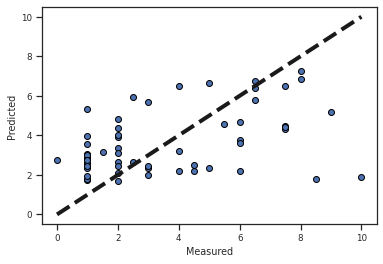

In [ ]:

from sklearn import linear_model

rf = RandomForestRegressor(n_estimators = 10, random_state = 42)





from sklearn import datasets

# boston = datasets.load_boston()
# print(boston)
# print(outcome_var)
predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB']
outcome_var = 'EDSS_post_10_years'
y = df[outcome_var]




# dfMerged[outcome_var]

from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(rf, df[predictor_var], y, cv=10)


fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()